# Data Analysis

The initial conditions are specified in `input.txt`. In order, the lines contain
```
input seed
input temperature
grid size
```

In [107]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

# Exercise 1 & 2

The system is run for $0.2 \leq \beta \leq 0.7$ where $\beta = 1/T$ $\therefore 1.4 \leq T \leq 5$.

The magnetisation and system energy are recorded.

<ipython-input-108-5c45a5ec109b>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
<ipython-input-108-5c45a5ec109b>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)
<ipython-input-108-5c45a5ec109b>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

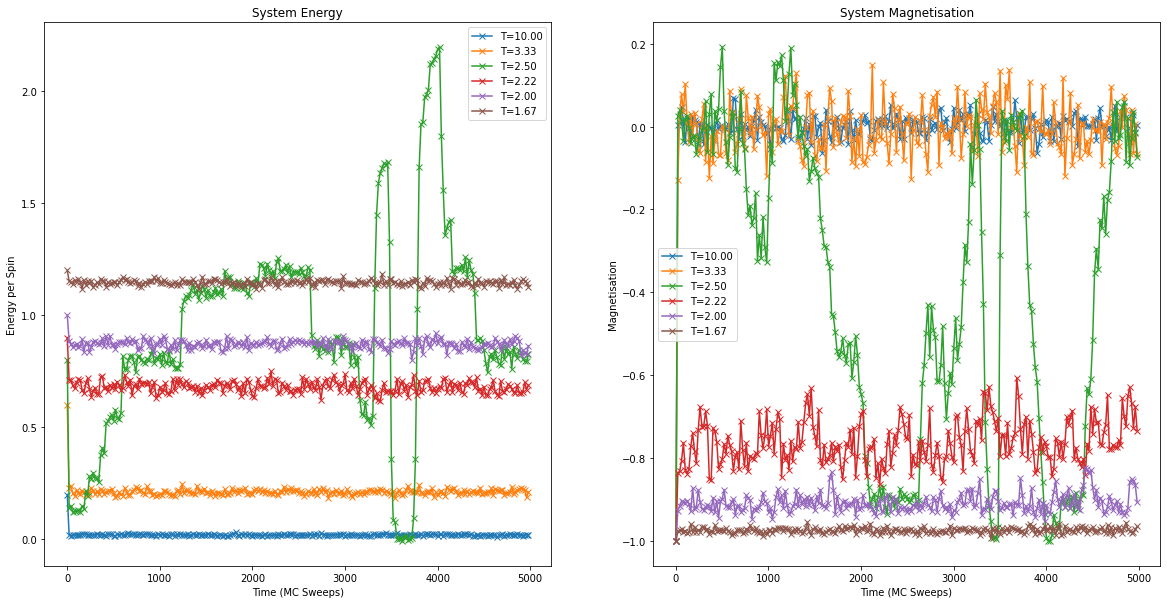

In [108]:
# inv_temperatures = [0.1, 0.2, 0.25, 0.3, 0.333333, 0.35, 0.4, 0.45, 0.5, 0.6]
inv_temperatures = [0.1, 0.3, 0.4, 0.45, 0.5, 0.6]
data = {}

plt.figure(figsize=([20, 8]))

for inv_temperature in inv_temperatures:

    filename = f"{inv_temperature:.6f}.csv"
    current_data = pd.read_csv(filename, sep=',', header=0, skiprows=2)[0:5000:20]
    data[f"{inv_temperature:.2f}.csv"] = current_data

    plt.subplot(121)
    plt.xlabel("Time (MC Sweeps)")
    plt.ylabel('Energy per Spin')
    plt.title("System Energy")
    plt.plot(current_data.time, current_data.energy, '-x', label=f"T={(1/float(filename.replace('.csv', ''))):.2f}")
    plt.legend()

    plt.subplot(122)
    plt.xlabel("Time (MC Sweeps)")
    plt.ylabel("Magnetisation")
    plt.title("System Magnetisation")
    plt.plot(current_data.time, current_data.magnetisation, '-x', label=f"T={(1/float(filename.replace('.csv', ''))):.2f}")
    plt.legend()

plt.show()

# Exercise 3

Comparison with mean field theory data.

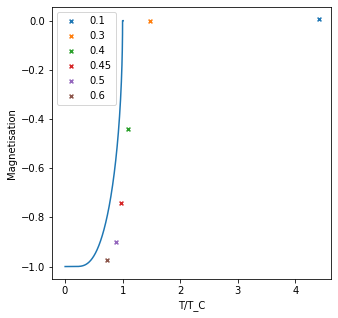

In [109]:
import scipy.constants

data["meanfield"] = pd.read_csv('meanfield_isingdata_CSV.csv')
data["meanfield"].head()
# J = 1
# k_b = scipy.constants.Boltzmann
# T_C = 2.27*J/k_b
T_C = 2.27

plt.figure(figsize=[5,5])

plt.xlabel("T/T_C")
plt.ylabel("Magnetisation")
plt.plot(data["meanfield"]['T/T_C'], -data["meanfield"]['m'])

for inv_temperature in inv_temperatures:
    target_data = data[f"{inv_temperature:.2f}.csv"]["magnetisation"]
    average_magentisation = np.average(target_data[-100: -1])
    temperature = 1/inv_temperature
    plt.scatter(temperature/T_C, average_magentisation, 15, marker='x', label=inv_temperature)

plt.legend()
plt.show()

<ipython-input-110-f1ba670b1b9a>:10: RuntimeWarning: divide by zero encountered in true_divide
  np.power(np.sinh(T_C/T * np.log(2.414)),4)
<ipython-input-110-f1ba670b1b9a>:8: RuntimeWarning: invalid value encountered in power
  m = - np.power(


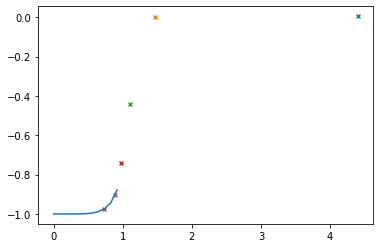

In [110]:
for inv_temperature in inv_temperatures:
    target_data = data[f"{inv_temperature:.2f}.csv"]["magnetisation"]
    average_magentisation = np.average(target_data[-100: -1])
    temperature = 1/inv_temperature
    plt.scatter(temperature/T_C, average_magentisation, 15, marker='x', label=inv_temperature)

T = np.linspace(0, 5, 25)
m = - np.power(
    1 - 1/(
        np.power(np.sinh(T_C/T * np.log(2.414)),4)
    ),
    1/8
)
plt.plot(T/T_C, m)